### Data Preparation

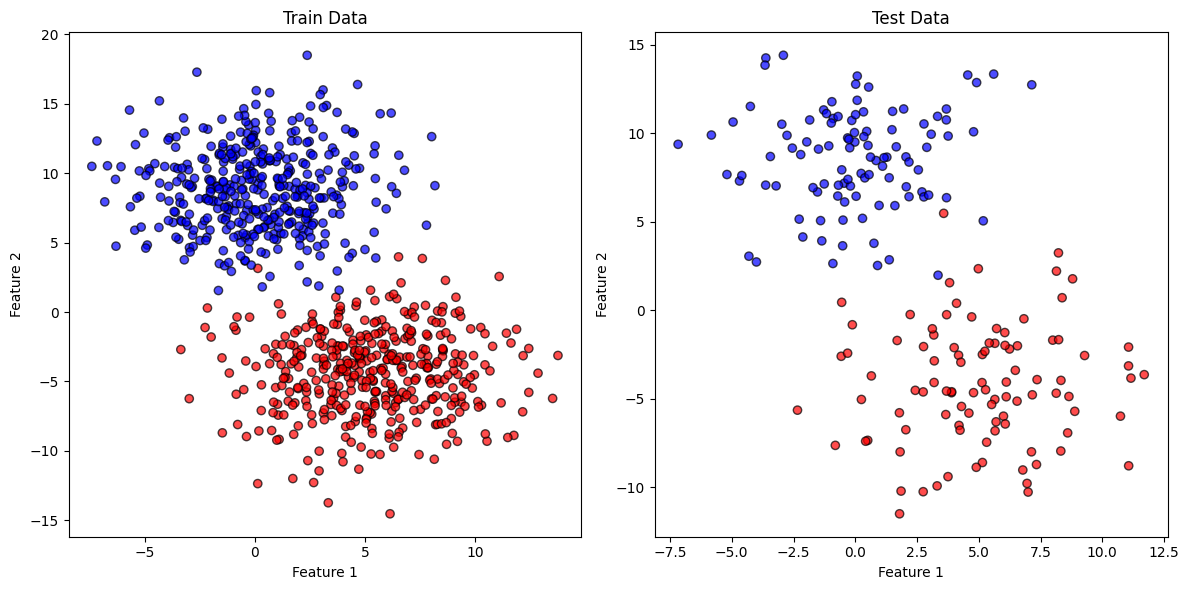

In [56]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_blobs(
    n_samples=1000, n_features=2, centers=2, cluster_std=3, random_state=23
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23, shuffle=True
)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, cmap="bwr", alpha=0.7, edgecolor="k"
)
ax[0].set_title("Train Data")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# Test
ax[1].scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap="bwr", alpha=0.7, edgecolor="k"
)
ax[1].set_title("Test Data")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

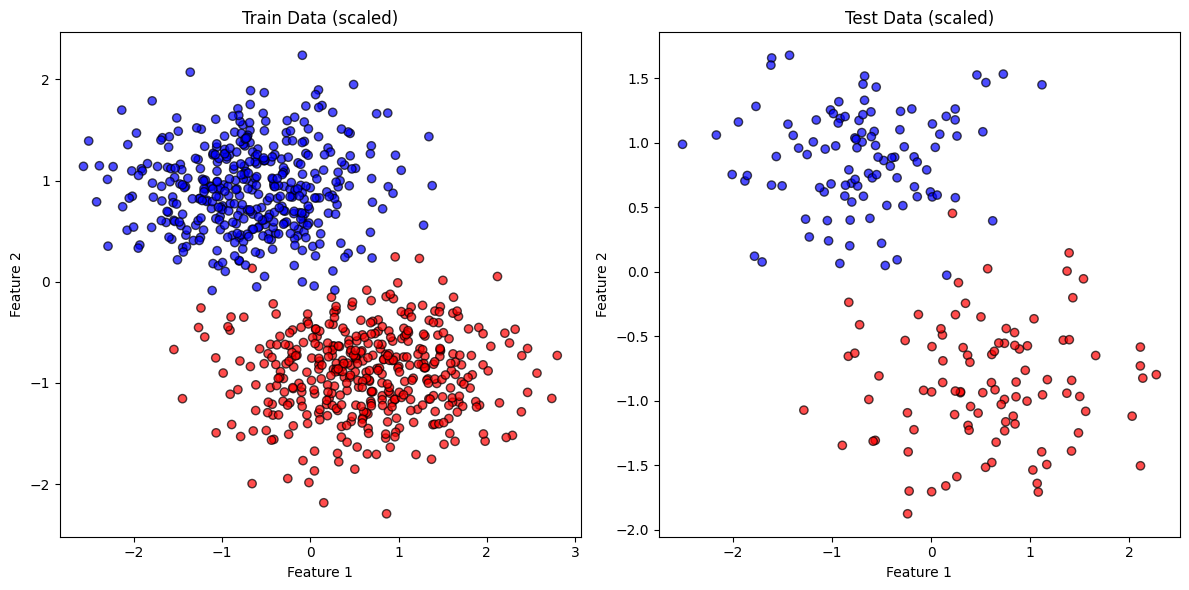

In [57]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

fig, ax = plt.subplots(1, 2, figsize=(12,6))

# Train
ax[0].scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="bwr", alpha=0.7, edgecolor="k")
ax[0].set_title("Train Data (scaled)")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# Test
ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="bwr", alpha=0.7, edgecolor="k")
ax[1].set_title("Test Data (scaled)")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

# Single Layer Perceptron

In [ ]:
import numpy as np


class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.weights = np.random.randn(num_inputs) * 0.01
        self.bias = 0.0

    def _heaviside_step_fn(self, z):
        return 1 if z >= 0 else 0

    def _predict(self, inputs):
        sum = np.sum(self.weights * inputs) + self.bias
        return self._heaviside_step_fn(sum)

    def _error(self, prediction, target):
        return prediction - target

    def train(self, inputs, target):
        # Predict Output
        prediction = self._predict(inputs)

        # Calculate Loss
        error = self._error(prediction, target)

        # Update Weights and Biases
        self.weights += self.learning_rate * error * inputs
        self.bias += self.learning_rate * error

    def fit(self, X, y, epochs):
        for _ in range(epochs):
            for inputs, target in zip(X, y):
                self.train(inputs, target)

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

### Training Model

In [73]:
model = Perceptron(num_inputs=2)

model.fit(X_train, y_train, 10)

print(model.weights)
print(model.bias)

[-54.37020722  72.05180935]
-0.7300000000000004


### Predicting

In [ ]:
y_pred = model.predict(X_test)

accuracy = np.mean(y_pred != y_test)
print("Accuracy:", accuracy)

Accuracy: 0.975


# Implementing Using PyTorch

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert to pytorch tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

In [84]:
class PerceptronModel(nn.Module):
    def __init__(self, input_dim):
        super(PerceptronModel, self).__init__()

        self.linear = nn.Linear(input_dim, 1) # Single Layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [85]:
model = PerceptronModel(input_dim=2)

criterion = nn.BCELoss() # Binary cross entropy
optimizer = optim.SGD(model.parameters(), lr=0.1) # Stochastic Gradient Descent

In [86]:
epochs = 50

for epoch in range(epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/50], Loss: 0.3626
Epoch [20/50], Loss: 0.3010
Epoch [30/50], Loss: 0.2596
Epoch [40/50], Loss: 0.2298
Epoch [50/50], Loss: 0.2072


In [87]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_label = (y_pred >= 0.5).float()  # convert probabilities to 0/1
    accuracy = (y_pred_label.eq(y_test).sum() / y_test.shape[0]).item()
    print("Test Accuracy:", accuracy)

Test Accuracy: 0.9700000286102295


### Single Perceptron

In [5]:
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, num_features):
        super().__init__()

        self.linear = nn.Linear(in_features=num_features, out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, features):
        out = self.linear(features)
        out = self.sigmoid(out)

        return out

In [6]:
# Create Dataset

features = torch.rand(10, 5)

model = Model(features.shape[1])

model(features)

tensor([[0.5207],
        [0.5811],
        [0.5503],
        [0.5781],
        [0.6124],
        [0.5802],
        [0.6232],
        [0.5138],
        [0.5680],
        [0.5855]], grad_fn=<SigmoidBackward0>)

In [10]:
model.linear.weight

Parameter containing:
tensor([[ 0.3690, -0.1297, -0.3654,  0.0447,  0.1123]], requires_grad=True)

In [11]:
!pip install torchinfo


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [12]:
from torchinfo import summary

summary(model, input_size=(10, 5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00